![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 8. <i>Neuronowy model języka</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## Neuronowy n-gramowy model języka



Omówiony w poprzedniej części neuronowy bigramowy model języka
warunkuje kolejny wyraz jedynie względem bezpośrednio poprzedzającego
— jak w każdym bigramowym modelu przyjmujemy założenie, że $w_i$
zależy tylko od $w_{i-1}$. Rzecz jasna jest to bardzo duże
ograniczenie, w rzeczywistości bardzo często prawdopodobieństwo
kolejnego wyrazu zależy od wyrazu dwie, trzy, cztery itd. pozycje
wstecz czy w ogólności od wszystkich wyrazów poprzedzających (bez
względu na ich pozycje).

**Pytanie**: Wskaż zależności o zasięgu większym niż 1 wyraz w zdaniu
/Zatopieni w kłębach dymu cygar i pochyleni nad butelkami z ciemnego
szkła obywatele tej dzielnicy, jedni zakładali się o wygranę lub
przegranę Anglii, drudzy o bankructwo Wokulskiego; jedni nazywali
geniuszem Bismarcka, drudzy — awanturnikiem Wokulskiego; jedni
krytykowali postępowanie prezydenta MacMahona, inni twierdzili, że
Wokulski jest zdecydowanym wariatem, jeżeli nie czymś gorszym…/



### Trigramowy neuronowy model języka



Spróbujmy najpierw rozszerzyć nasz model na trigramy, to znaczy
będziemy przewidywać słowo $w_i$ na podstawie słów $w_{i-2}$ i
$w_{i-1}$.

Najprostsze rozwiązanie polegałoby na zanurzeniu pary $(w_{i-2},
w_{i-1})$ w całości i postępowaniu jak w przypadku modelu bigramowego.
Byłoby to jednak zupełnie niepraktyczne, jako że:

-   liczba zanurzeń do wyuczenia byłaby olbrzymia ($|V|^2$ — byłoby to
    ewentualnie akceptowalne dla modeli operujących na krótszych
    jednostkach niż słowa, np. na znakach),
-   w szczególności zanurzenia dla par $(v, u)$, $(u, v)$, $(u, u)$ i
    $(v, v)$ nie miałyby ze sobą nic wspólnego.



#### Konketanacja zanurzeń



Właściwsze rozwiązanie polega na zanurzeniu dalej pojedynczych słów i
następnie ich **konkatenowaniu**.

Przypomnijmy, że konkatenacja wektorów $\vec{x_1}$ i $\vec{x_2}$ to wektor o rozmiarze
$|\vec{x_1}| + |\vec{x_2}|$ powstały ze „sklejania” wektorów $\vec{x_1}$ i $\vec{x_2}$.
Konkatenację wektorów $\vec{x_1}$ i $\vec{x_2}$ będziemy oznaczać za pomocą $[\vec{x_1}, \vec{x_2}]$.

Przykład: jeśli $\vec{x_1} = [-1, 2, 0]$ i $\vec{x_2} = [3, -3]$,
wówczas $[\vec{x_1}, \vec{x_2}] = [-1, 2, 0, 3, -3]$

Oznacza to, że nasza macierz „kontekstowa” $C$ powinna mieć w modelu trigramowym rozmiar nie
$|V| \times m$, lecz $|V| \times (m+m)$ = $|V| \times 2m$ i wyjście będzie zdefiniowane za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C[E(w_{i-2}),E(w_{i-1})]),$$

co można przedstawić za pomocą następującego schematu:

![img](./08_Neuronowy_ngramowy_model/trigram1.drawio.png "Diagram prostego bigramowego neuronowego modelu języka")



##### Rozbicie macierzy $C$



Zamiast mnożyć macierz $C$ przez konkatenację dwóch wektorów, można
rozbić macierz $C$ na dwie, powiedzmy $C_{-2}$ i $C_{-1}$, przemnażać
je osobno przez odpowiadające im wektory i następnie **dodać** macierze,
tak aby:

$$C[E(w_{i-2}),E(w_{i-1})] = C_{-2}E(w_{i-2}) + C_{-1}E(w_{i-1}).$$

Macierze $C_{-2}$ i $C_{-1}$ będą miały rozmiar $|V| \times m$.

Przy tym podejściu możemy powiedzieć, że ostatni i przedostatni wyraz
mają swoje osobne macierze o potencjalnie różnych wagach — co ma sens,
jako że na inne aspekty zwracamy uwagę przewidując kolejne słowo na
podstawie wyrazu bezpośrednio poprzedzającego, a na inne — na
podstawie słowa występującego dwie pozycje wcześniej.



### Uogólnienie na $n$-gramowy model języka dla dowolnego $n$



Łatwo uogólnić opisany wyżej trigramowy model języka dla dowolnego $n$.
Uogólniony model można przedstawić za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C[E(w_{i-n+1}),\dots,E(w_{i-1})]),$$

gdzie macierz $C$ ma rozmiar $|V| \times nm$ lub za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C_{-(n-1)}E(w_{i-n+1}) + \dots + C_{-1}E(w_{i-1}),$$

gdzie macierze $C_{-(n-1)}$, &hellip;, $C_{-1}$ mają rozmiary $|V| \times m$.

Por. diagram:

![img](./08_Neuronowy_ngramowy_model/ngram.drawio.png "Diagram prostego n-gramowego neuronowego modelu języka")



### Dodanie kolejnej warstwy



W wypadku trigramowego czy — ogólniej — n-gramowego modelu języka dla
$n \geq 3$ warto dodać kolejną (**ukrytą**) warstwę, na którą będziemy rzutować
skonkatenowane embeddingi, zanim zrzutujemy je do długiego wektora
prawdopodobieństw.

Zakładamy, że warstwa ukryta zawiera $h$ neuronów. Wartość $h$ powinna być mniejsza
niż $nm$ (a może nawet od $m$).

**Pytanie**: Dlaczego wartość $h > nm$ nie jest racjonalnym wyborem?

**Pytanie**: Dlaczego dodanie kolejnej warstwy nie ma sensu dla modelu bigramowego?



#### Funkcja aktywacji



Aby warstwa ukryta wnosiła coś nowego, na wyjściu z tej funkcji musimy (dlaczego?)
zastosować nieliniową **funkcji aktywacji**. Zazwyczaj jako funkcji
aktywacji w sieciach neuronowych używa się funkcji ReLU albo funkcji
sigmoidalnej. W prostych neuronowych modelach języka sprawdza się też
**tangens hiperboliczny** (tgh, w literaturze anglojęzycznej tanh):

$$\operatorname{tgh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.$$



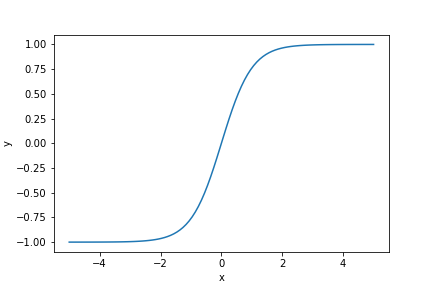

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.linspace(-5,5,100)
plt.xlabel("x")
plt.ylabel("y")
a = torch.Tensor(x.size()[0]).fill_(2.)
m = torch.stack([x, a])
plt.plot(x, nn.functional.tanh(m)[0])
fname = '08_Neuronowy_ngramowy_model/tanh.png'
plt.savefig(fname)
fname

##### Tangens hiperboliczny zastosowany dla wektora



Tangens hiperboliczny wektora będzie po prostu wektorem tangensów
hiperbolicznych poszczególnych wartości.



In [1]:
import torch
import torch.nn as nn

v = torch.Tensor([-100, -2.0, 0.0, 0.5, 1000.0])
nn.functional.tanh(v)

[[[tensor](tensor)([-1.0000, -0.9640,  0.0000,  0.4621,  1.0000])]]



#### Wzór i schemat dwuwarstwowego n-gramowego neuronowego modelu języka



Dwuwarstwowy model języka będzie określony następującym wzorem:

$$\vec{y} = \operatorname{softmax}(C\operatorname{tgh}(W[E(w_{i-n+1}),\dots,E(w_{i-1})])),$$

gdzie:

-   $W$ jest wyuczalną macierzą wag o rozmiarze $h \times nm$,
-   $C$ będzie macierzą o rozmiarze $|V| \times h$.

Zmodyfikowaną sieć można przedstawić za pomocą następującego schematu:

![img](./08_Neuronowy_ngramowy_model/ngram-tgh.drawio.png "Dwuwarstwowy n-gramowy neuronowy model języka")



#### Liczba wag w modelu dwuwarstwowym



Na wagi w modelu dwuwarstwowym składają się:

-   zanurzenia: $m|V|$,
-   wagi warstwy ukrytej: $hnm$,
-   wagi warstwy wyjściowej: $|V|h$,

a zatem łącznie:

$$m|V| + hnm + |V|h$$

Jeśli $h \approx m$ (co jest realistyczną opcją), wówczas otrzymamy oszacowanie:

$$O(m|V| + nm^2).$$

Zauważmy, że względem $n$ oznacza to bardzo korzystną złożoność
$O(n)$! Oznacza to, że nasz model może działać dla dużo większych
wartości $n$ niż tradycyjny, statystyczny n-gramowy model języka (dla którego
wartości $n > 5$ zazwyczaj nie mają sensu).



### Model worka słów



Jak stwierdziliśmy przed chwilą, dwuwarstwowy n-gramowy model języka
może działać dla stosunkowo dużego $n$. Zauważmy jednak, że istnieje
pewna słabość tego modelu. Otóż o ile intuicyjnie ma sens odróżniać
słowo poprzedzające, słowo występujące dwie pozycje wstecz i zapewne
trzy pozycje wstecz, a zatem uczyć się osobnych macierzy $C_{-1}$,
$C_{-2}$, $C_{-3}$ to różnica między wpływem słowa
występującego cztery pozycje wstecz i pięć pozycji wstecz jest już
raczej nieistotna; innymi słowy różnica między macierzami $C_{-4}$ i
$C_{-5}$ będzie raczej niewielka i sieć niepotrzebnie będzie uczyła
się dwukrotnie podobnych wag. Im dalej wstecz, tym różnica wpływu
będzie jeszcze mniej istotna, można np. przypuszczać, że różnica
między $C_{-10}$ i $C_{-13}$ nie powinna być duża.

Spróbujmy najpierw zaproponować radykalne podejście, w którym nie
będziemy w ogóle uwzględniać pozycji słów (lub będziemy je uwzględniać
w niewielkim stopniu), później połączymy to z omówionym wcześniej
modelem $n$-gramowym.



#### Agregacja wektorów



Zamiast patrzeć na kilka poprzedzających słów, można przewidywać na
podstawie **całego** ciągu słów poprzedzających odgadywane słowo. Zauważmy jednak, że
sieć neuronowa musi mieć ustaloną strukturę, nie możemy zmieniać jej
rozmiaru. Musimy zatem najpierw zagregować cały ciąg do wektora o
**stałej** długości. Potrzebujemy zatem pewnej funkcji agregującej $A$, takiej by
$A(w_1,\dots,w_{i-1})$ było wektorem o stałej długości, niezależnie od $i$.



#### Worek słów



Najprostszą funkcją agregującą jest po prostu… suma. Dodajemy po
prostu zanurzenia słów:

$$A(w_1,\dots,w_{i-1}) = E(w_1) + \dots + E(w_{i-1}) = \sum_{j=1}^{i-1} E(w_j).$$

**Uwaga**: zanurzenia słów nie zależą od pozycji słowa (podobnie było w wypadku n-gramowego modelu!).

Jeśli rozmiar zanurzenia (embeddingu) wynosi $m$, wówczas rozmiar
wektora uzyskanego dla całego poprzedzającego tekstu wynosi również $m$.

Proste dodawanie wydaje się bardzo „prostacką” metodą, a jednak
suma wektorów słów jest **zaskakująco skuteczną metodą zanurzenia
(embedowania) całych tekstów (doc2vec)**. Prostym wariantem dodawania jest obliczanie **średniej wektorów**:

$$A(w_1,\dots,w_{i-1}) = \frac{E(w_1) + \dots + E(w_{i-1})}{i-1} = \frac{\sum_{j=1}^{i-1} E(w_j)}{i-1}.$$

Tak czy siak uzyskany wektor **nie zależy od kolejności słów**
(dodawanie jest przemienne i łączne!). Mówimy więc o **worku słów**
(*bag of words*, *BoW*) — co ma symbolizować fakt, że słowa są
przemieszane, niczym produkty w torbie na zakupy.



##### Schemat graficzny modelu typu worek słów



Po zanurzeniu całego poprzedzającego tekstu postępujemy podobnie jak w
modelu bigramowym — rzutujemy embedding na długi wektor wartości, na
którym stosujemy funkcję softmax:

![img](./08_Neuronowy_ngramowy_model/bow1.drawio.png "Model typu worek słów")

Odpowiada to wzorowi:

$$y = \operatorname{softmax}(C\sum_{j=1}^{i-1} E(w_j)).$$



#### Jak traktować powtarzające się słowa?



Według wzoru podanego wyżej, jeśli słowo w poprzedzającym tekście
pojawia się więcej niż raz, jego embedding zostanie zsumowany odpowiednią liczbę razy.
Na przykład embedding tekstu *to be or not to be* będzie wynosił:

$$E(\mathrm{to}) + E(\mathrm{be}) + E(\mathrm{or}) + E(\mathrm{not}) + E(\mathrm{to}) + E(\mathrm{be}) = 2E(\mathrm{to}) + 2E(\mathrm{be}) + E(\mathrm{or}) + E(\mathrm{not}).$$

Innymi słowy, choć w worku słów nie uwzględniamy kolejności słów, to
**liczba wystąpień** ma dla nas ciągle znaczenie. Można powiedzieć, że
traktujemy poprzedzający tekst jako **multizbiór** (struktura
matematyczna, w której nie uwzględnia się kolejności, choć zachowana
jest informacja o liczbie wystąpień).



##### Zbiór słów



Oczywiście moglibyśmy przy agregowaniu zanurzeń pomijać powtarzające
się słowa, a zatem zamiast multizbioru słów rozpatrywać po prostu ich zbiór:

$$A(w_1,\dots,w_{i-1}) = \sum_{w \in \{w_1,\dots,w_{i-1}\}} E(w).$$

Jest kwestią dyskusyjną, czy to lepsze czy gorsze podejście — w końcu
liczba wystąpień np. słów *Ukraina* czy *Polska* może wpływać w jakimś
stopniu na prawdopodobieństwo kolejnego słowa (*Kijów* czy
*Warszawa*?).



#### Worek słów a wektoryzacja tf



Wzór na sumę zanurzeń słów można przekształcić w taki sposób, by
sumować po wszystkich słowach ze słownika, zamiast po słowach rzeczywiście występujących w tekście:

$$A(w_1,\dots,w_{i-1}) = \sum_{j=1}^{i-1} E(w_j) = \sum_{w \in V} \#wE(w)$$

gdzie $\#w$ to liczba wystąpień słowa $w$ w ciagu $w_1,\dots,w_{i-1}$ (w wielu przypadkach równa zero!).

Jeśli teraz zanurzenia będziemy reprezentować jako macierz $E$ (por. poprzedni wykład),
wówczas sumę można przedstawić jako iloczyn macierzy $E$ i pewnego wektora:

$$A(w_1,\dots,w_{i-1}) = E(w) [\#w^1,\dots,\#w^{|V|}]^T.$$

(Odróżniamy $w^i$ jako $i$-ty wyraz w słowniku $V$ od $w_i$ jako $i$-tego wyraz w rozpatrywanym ciągu).

Zwróćmy uwagę, że wektor $[\#w_1,\dots,\#w_{|V|}]$ to po prostu
reprezentacja wektora poprzedzającego tekstu (tj. ciągu
$(w_1,\dots,w_{i-1})$) przy użyciu schematu wektoryzacji tf (*term
frequency*). Przypomnijmy, że tf to reprezentacja tekstu przy użyciu
wektorów o rozmiarze $|V|$ — na każdej pozycji odnotowujemy liczbę wystąpień.
Wektory tf są **rzadkie**, tj. na wielu pozycjach zawierają zera.

Innymi słowy, nasz model języka *bag of words* można przedstawić za pomocą wzoru:

$$y = \operatorname{softmax}(C\operatorname{tf}(w_1,\dots,w_{i-1})),$$

co można zilustrować w następujący sposób:

![img](./08_Neuronowy_ngramowy_model/bow2.drawio.png "Model typu worek słów — alternatywna reprezentacja")

Można stwierdzić, że zanurzenie tekstu przekształca rzadki, długi wektor
tf w gęsty, krótki wektor.



### Ważenie słów



Czy wszystkie słowa są tak samo istotne? Rzecz jasna, nie:

-   jak już wiemy z naszych rozważań dotyczących n-gramowych modeli języka, słowa bezpośrednio
    poprzedzające odgadywany wyraz mają większy wpływ niż słowa wcześniejsze;
    intuicyjnie, wpływ słów stopniowo spada — tym bardziej, im bardziej słowo jest oddalone od słowa odgadywanego;
-   jak wiemy z wyszukiwania informacji, słowa, które występują w wielu tekstach czy dokumentach, powinny mieć
    mniejsze znaczenie, w skrajnym przypadku słowa występujące w prawie każdym tekście (*że*, *w*, *i* itd.) powinny
    być praktycznie pomijane jako *stop words* (jeśli rozpatrywać je w „masie” worka słów — oczywiście
    to, czy słowo poprzedzające odgadywane słowo to *że*, *w* czy *i* ma olbrzymie znaczenie!).

Zamiast po prostu dodawać zanurzenia, można operować na sumie (bądź średniej) ważonej:

$$\sum_{j=1}^{i-1} \omega(j, w_j)E(w_j),$$

gdzie $\omega(j, w_j)$ jest pewną wagą, która może zależeć od pozycji $j$ lub samego słowa $w_j$.



#### Uwzględnienie pozycji



Można w pewnym stopniu złamać „workowatość” naszej sieci przez proste
uwzględnienie pozycji słowa, np. w taki sposób:

$$\omega(j, w_j) = \beta^{i-j-1},$$

dla pewnego hiperparametru $\beta$. Na przykład jeśli $\beta=0,9$,
wówczas słowo bezpośrednio poprzedzające dane słowo ma $1 / 0,9^9 \approx 2,58$
większy wpływ niż słowo występujące 10 pozycji wstecz.



#### Odwrócona częstość dokumentowa



Aby większą wagę przykładać do słów występujących w mniejszej liczbie
dokumentów, możemy użyć, znanej z wyszukiwania informacji,
odwrotnej częstości dokumentowej (*inverted document frequency*, *idf*):

$$\omega(j, w_j) = \operatorname{idf}_S(w_j) = \operatorname{log}\frac{|S|}{\operatorname{df}_S(w_j)},$$

gdzie:

-   $S$ jest pewną kolekcją dokumentów czy tekstów, z którego pochodzi przedmiotowy ciąg słów,
-   $\operatorname{df}_S(w)$ to częstość dokumentowa słowa $w$ w kolekcji $S$, tzn. odpowiedź na pytanie,
    w ilu dokumentach występuje $w$.

Rzecz jasna, ten sposób ważenia oznacza tak naprawdę zastosowanie wektoryzacji tf-idf zamiast tf,
nasza sieć będzie dana zatem wzorem:

$$y = \operatorname{softmax}(C\operatorname{tfidf}(w_1,\dots,w_{i-1})).$$



#### Bardziej skomplikowane sposoby ważenia słów



Można oczywiście połączyć odwrotną częstość dokumentową z uwzględnieniem pozycji słowa:

$$\omega(j, w_j) = \beta^{i-j-1}\operatorname{idf}_S(w_j).$$

**Uwaga**: „wagi” $\omega(j, w_j)$ nie są tak naprawdę wyuczalnymi
wagami (parametrami) naszej sieci neuronowej, terminologia może być
tutaj myląca. Z punktu widzenia sieci neuronowej $\omega(j, w_j)$ są
stałe i **nie** są optymalizowane w procesie propagacji wstecznej. Innymi
słowy, tak zdefiniowane $\omega(j, w_j)$ zależą tylko od:

-   hiperparametru $\beta$, który może być optymalizowany już poza siecią (w procesie **hiperoptymalizacji**),
-   wartości $\operatorname{idf}_S(w_j)$ wyliczanych wcześniej na podstawie kolekcji $S$.

**Pytanie**: czy wagi $\omega(j, w_j)$ mogłyby sensownie uwzględniać
jakieś parametry wyuczalne z całą siecią?



### Modelowanie języka przy użyciu bardziej złożonych neuronowych sieci *feed-forward*



Można połączyć zalety obu ogólnych podejść (n-gramowego modelu i worka
słów) — można **równocześnie** traktować w specjalny sposób (na
przykład) dwa poprzedzające wyrazy, wszystkie zaś inne wyrazy
reprezentować jako „tło” modelowane za pomocą worka słów lub podobnej
reprezentacji. Osiągamy to poprzez konkatenację wektora
poprzedzającego słowa, słowa występującego dwie pozycje wstecz oraz
zagregowanego zanurzenia całego wcześniejszego tekstu:

$$y = \operatorname{softmax}(C[E(w_{i-1}),E(w_{i-2}),A(w_1,\dots,w_{i-3})]),$$

czy lepiej z dodatkową warstwą ukrytą:

$$y = \operatorname{softmax}(C\operatorname{tgh}(W[E(w_{i-1}),E(w_{i-2}),A(w_1,\dots,w_{i-3})])),$$

W tak uzyskanym dwuwarstwowym neuronowym modelu języka, łączącym model
trigramowy z workiem słów, macierz $W$ ma rozmiar $h \times 3m$.

**Pytanie**: jakie mamy możliwości, jeśli zamiast przewidywać kolejne słowo, mamy za zadanie
odgadywać słowo w luce (jak w wyzwaniach typu *word gap*)?



### Literatura



Skuteczny n-gramowy neuronowy model języka opisano po raz pierwszy
w pracy [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf) autorstwa  Yoshua Bengio i in.

